In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\RICHA\Downloads\SMS\spam.csv',encoding_errors= 'replace')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1282,ham,Ever green quote ever told by Jerry in cartoon...,NaN,NaN,NaN
3728,ham,I'm at home. Please call,NaN,NaN,NaN
2816,spam,Gr8 Poly tones 4 ALL mobs direct 2u rply with ...,NaN,NaN,NaN
2311,spam,Congratulations! Thanks to a good friend U hav...,NaN,NaN,NaN
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
87,ham,Yes I started to send requests to make it but ...
3206,ham,This phone has the weirdest auto correct.
733,ham,Even u dont get in trouble while convincing..j...
3532,ham,"Sorry, I'll call later"
1533,ham,Horrible bf... I now v hungry...


In [9]:
# Renaming the columns to make it more descriptic
df.rename(columns={'v1':'Target', 'v2':'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Preprocessing Target i.e. converting it from text to numerical value

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target']= encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# To check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
# To check for duplicate values
df.duplicated().sum()

403

In [14]:
# Removing duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# 2. EDA

In [16]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# To know the number of HAM and SPAM in Target
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x22078995be0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

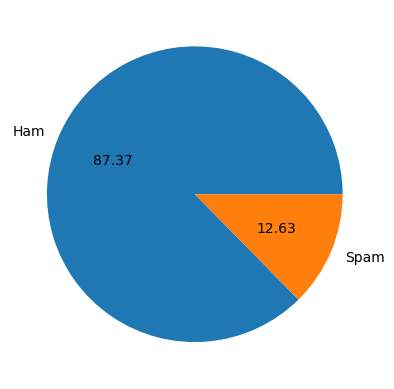

In [18]:
# To represent no. of HAM and SPAM
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct= '%0.2f')

In [19]:
# To count total number of characters in text
len(df.Text)

5169

In [20]:
# To count number of characters in each text
df['Num_characters'] = df.Text.apply(len)
df

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
df['Num_words'] = df['Text'].apply(lambda x : x.split(' '))
df['Num_words']

0       [Go, until, jurong, point,, crazy.., Available...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor..., U, c, already...
4       [Nah, I, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568       [Will, �_, b, going, to, esplanade, fr, home?]
5569    [Pity,, *, was, in, mood, for, that., So...any...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                    [Rofl., Its, true, to, its, name]
Name: Num_words, Length: 5169, dtype: object

In [22]:
df['Num_words'] = df['Text'].apply(lambda x : len(x.split(' ')))
df

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,30
5568,0,Will �_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Target          5169 non-null   int32 
 1   Text            5169 non-null   object
 2   Num_characters  5169 non-null   int64 
 3   Num_words       5169 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 181.7+ KB


In [24]:
df[['Num_characters','Num_words']].describe()

,Num_characters,Num_words
count,5169.000000,5169.000000
mean,78.923776,15.455988
std,58.174846,11.163853
min,2.000000,1.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [25]:
# Analyzing Ham msgs.
df[df['Target']== 0] 

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
6,0,Even my brother is not like to speak with me. ...,77,16
...,...,...,...,...
5565,0,Huh y lei...,12,3
5568,0,Will �_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [26]:
df[df['Target']== 0][['Num_characters','Num_words']].describe()

,Num_characters,Num_words
count,4516.000000,4516.000000
mean,70.456820,14.259743
std,56.356802,11.231781
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,19.000000
max,910.000000,171.000000


In [27]:
# Analyzing spam msgs.
df[df['Target']== 1] 

,Target,Text,Num_characters,Num_words
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,32
8,1,WINNER!! As a valued network customer you have...,157,26
9,1,Had your mobile 11 months or more? U R entitle...,154,29
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,26
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,28


In [28]:
df[df['Target']== 1][['Num_characters','Num_words']].describe()

,Num_characters,Num_words
count,653.000000,653.000000
mean,137.479326,23.728943
std,30.014336,5.985799
min,13.000000,2.000000
25%,131.000000,22.000000
50%,148.000000,25.000000
75%,157.000000,28.000000
max,223.000000,35.000000


So, by looking at the description of both Ham and Spam msgs, it is clear that Spam msgs are bigger in size.

<AxesSubplot:xlabel='Num_characters', ylabel='Count'>

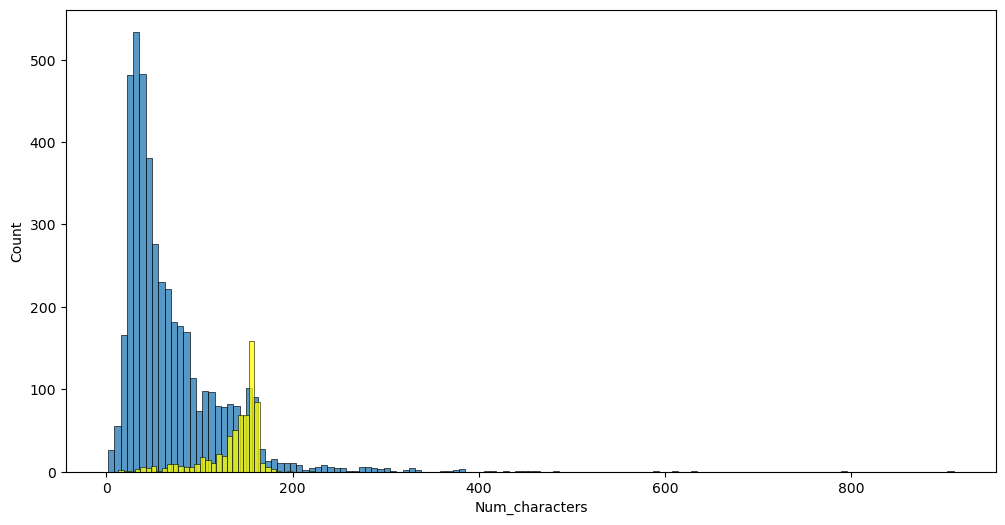

In [29]:
# To plot number of characters present in Ham in each msg.
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['Num_characters'])
sns.histplot(df[df['Target']==1]['Num_characters'],color = 'yellow')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

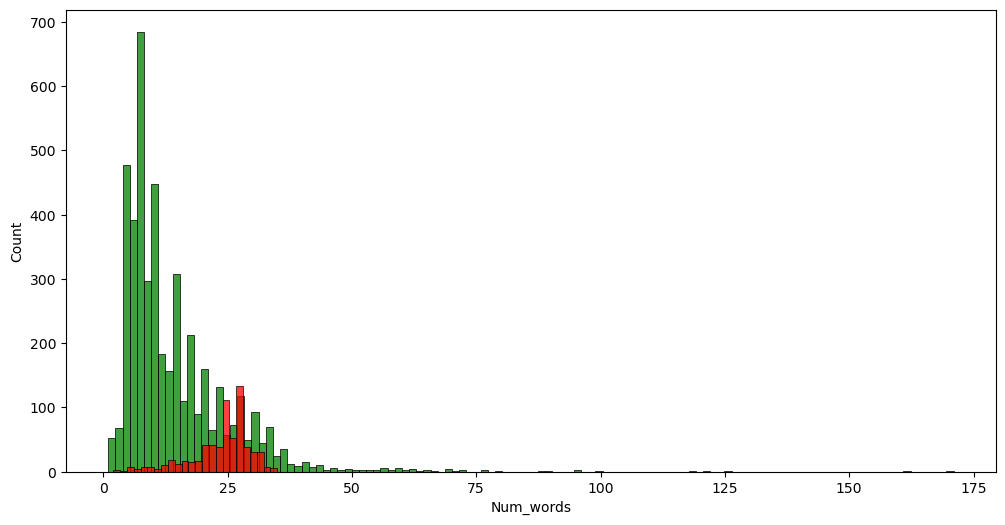

In [30]:
# To plot number of words present in Ham in each msg.
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['Num_words'],color = 'green')
sns.histplot(df[df['Target']==1]['Num_words'],color = 'red')

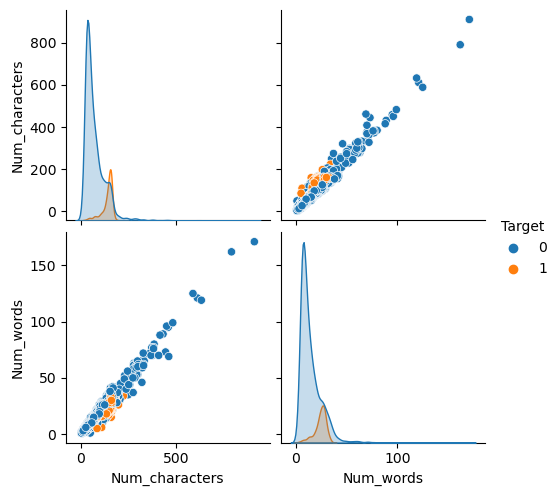

In [31]:
# Relationship between number of characters and words 
sns.pairplot(df,hue='Target')

In [32]:
# To see correlations by taking out Pearson Correlation Coefficient (r):
df.corr()

,Target,Num_characters,Num_words
Target,1.000000,0.382785,0.281818
Num_characters,0.382785,1.000000,0.974467
Num_words,0.281818,0.974467,1.000000


<AxesSubplot:>

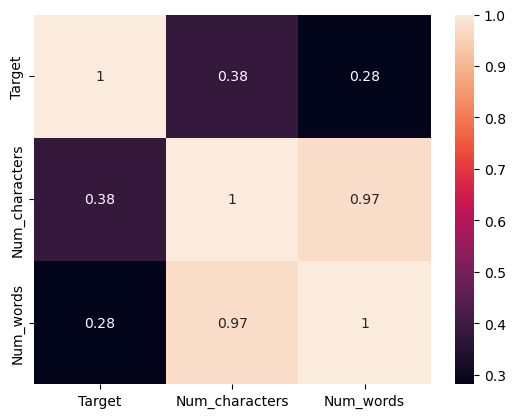

In [33]:
# Putting the correlations in heat map
sns.heatmap(df.corr(),annot= True)

# 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming
   

In [34]:
import gensim

In [35]:
from gensim.utils import tokenize

In [36]:
from gensim.parsing.preprocessing import remove_stopwords

In [37]:
from gensim.parsing.preprocessing import STOPWORDS

In [38]:
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
all_stopwords

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [39]:
remove_stopwords('HI, How are you Richa?')

'HI, How Richa?'

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
!pip install nltk

In [42]:
import nltk

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
def transform_text(text):
    text = text.lower()
    text = list(tokenize(text))
    
    t= []
    for i in text :
        if i.isalnum():
            t.append(i)
            
            
    text = t[:]
    t.clear()
    
    for i in text:
        if i not in string.punctuation and i not in all_stopwords:
                t.append(i)
                
    
    text = t[:]
    t.clear()                     
    
    for i in text :
        t.append(ps.stem(i))    
        
    return " ".join(t)                           # To return it in string form
                 
       

In [46]:
transform_text('HI, How are you Richa in singing?')

'hi richa sing'

In [47]:
df['Text'].apply(transform_text)

0       jurong point crazi avail bugi n great world la...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st t...
3                                     u dun earli hor u c
4                                nah t think goe usf live
                              ...                        
5567    nd time tri contact u u won pound prize claim ...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570     guy bitch act like d interest buy week gave free
5571                                            rofl true
Name: Text, Length: 5169, dtype: object

In [48]:
df['Transformed_text'] = df['Text'].apply(transform_text)
df

,Target,Text,Num_characters,Num_words,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entri wkli comp win fa cup final tkt st t...
3,0,U dun say so early hor... U c already then say...,49,11,u dun earli hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah t think goe usf live
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,30,nd time tri contact u u won pound prize claim ...
5568,0,Will �_ b going to esplanade fr home?,37,8,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,26,guy bitch act like d interest buy week gave free


In [49]:
df.head()

,Target,Text,Num_characters,Num_words,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entri wkli comp win fa cup final tkt st t...
3,0,U dun say so early hor... U c already then say...,49,11,u dun earli hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah t think goe usf live


In [50]:
# Extracting all the spam msgs
df[df['Target']==1]

,Target,Text,Num_characters,Num_words,Transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entri wkli comp win fa cup final tkt st t...
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,32,freemsg hey darl s week s word d like fun tb o...
8,1,WINNER!! As a valued network customer you have...,157,26,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,29,mobil month u r entitl updat latest colour mob...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,26,chanc win cash pound txt csh send cost p day d...
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,16,want explicit sex sec ring cost p min gsex pob...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,33,ask mobil chatlin inclu free min india cust se...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,28,contract mobil mnth latest motorola nokia free...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,28,remind o pound free credit detail great offer ...


In [51]:
# Taking out the transformed_test for the spam msgs.
df[df['Target']==1]['Transformed_text']

2       free entri wkli comp win fa cup final tkt st t...
5       freemsg hey darl s week s word d like fun tb o...
8       winner valu network custom select receivea pri...
9       mobil month u r entitl updat latest colour mob...
11      chanc win cash pound txt csh send cost p day d...
                              ...                        
5537    want explicit sex sec ring cost p min gsex pob...
5540    ask mobil chatlin inclu free min india cust se...
5547    contract mobil mnth latest motorola nokia free...
5566    remind o pound free credit detail great offer ...
5567    nd time tri contact u u won pound prize claim ...
Name: Transformed_text, Length: 653, dtype: object

In [52]:
# Converting it into list.
df[df['Target']==1]['Transformed_text'].tolist()

['free entri wkli comp win fa cup final tkt st text fa receiv entri question std txt rate t c s appli s',
 'freemsg hey darl s week s word d like fun tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free mobil updat free',
 'chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent won week free membership prize jackpot txt word claim t c www dbuk net lccltd pobox ldnw rw',
 'xxxmobilemovieclub use credit click wap link txt messag click http wap xxxmobilemovieclub com n qjkgighjjgcbl',
 'england v macedonia dont miss goal team news txt ur nation team england tri wale scotland txt poboxox w wq',
 'thank subscript rington uk mobil charg month confirm repli ye repli charg',
 'rodger burn msg tri repli sm free nokia mobil free camcord deliveri tomorrow',
 'sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect 

In [53]:
# To print it in text form
for msgs in df[df['Target']==1]['Transformed_text'].tolist():
    print(msgs)

free entri wkli comp win fa cup final tkt st text fa receiv entri question std txt rate t c s appli s
freemsg hey darl s week s word d like fun tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim claim code kl valid hour
mobil month u r entitl updat latest colour mobil camera free mobil updat free
chanc win cash pound txt csh send cost p day day tsandc appli repli hl info
urgent won week free membership prize jackpot txt word claim t c www dbuk net lccltd pobox ldnw rw
xxxmobilemovieclub use credit click wap link txt messag click http wap xxxmobilemovieclub com n qjkgighjjgcbl
england v macedonia dont miss goal team news txt ur nation team england tri wale scotland txt poboxox w wq
thank subscript rington uk mobil charg month confirm repli ye repli charg
rodger burn msg tri repli sm free nokia mobil free camcord deliveri tomorrow
sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect end repli end sptv
congrat year special ci

In [54]:
# Seperating all the words form span
spam_corpus = []
for msgs in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msgs.split( ):
        spam_corpus.append(word)
    

In [55]:
spam_corpus

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 'st',
 'text',
 'fa',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'appli',
 's',
 'freemsg',
 'hey',
 'darl',
 's',
 'week',
 's',
 'word',
 'd',
 'like',
 'fun',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'claim',
 'code',
 'kl',
 'valid',
 'hour',
 'mobil',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'mobil',
 'updat',
 'free',
 'chanc',
 'win',
 'cash',
 'pound',
 'txt',
 'csh',
 'send',
 'cost',
 'p',
 'day',
 'day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 'info',
 'urgent',
 'won',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 't',
 'c',
 'www',
 'dbuk',
 'net',
 'lccltd',
 'pobox',
 'ldnw',
 'rw',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'txt',


In [56]:
len(spam_corpus)

9398

In [57]:
# Number of times each word ocurred
from collections import Counter
Counter(spam_corpus).most_common(30)

[('free', 197),
 ('p', 158),
 ('u', 157),
 ('txt', 152),
 ('text', 129),
 ('mobil', 121),
 ('ur', 119),
 ('stop', 114),
 ('repli', 104),
 ('claim', 98),
 ('prize', 85),
 ('s', 84),
 ('www', 83),
 ('t', 82),
 ('min', 78),
 ('tone', 73),
 ('cash', 65),
 ('servic', 65),
 ('new', 64),
 ('uk', 63),
 ('nokia', 62),
 ('send', 61),
 ('won', 61),
 ('msg', 61),
 ('urgent', 58),
 ('win', 57),
 ('c', 56),
 ('award', 56),
 ('contact', 56),
 ('week', 55)]

In [58]:
# Putting it in a dataframe
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,free,197
1,p,158
2,u,157
3,txt,152
4,text,129
5,mobil,121
6,ur,119
7,stop,114
8,repli,104
9,claim,98


C:\Users\RICHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'free'),
  Text(1, 0, 'p'),
  Text(2, 0, 'u'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'mobil'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'stop'),
  Text(8, 0, 'repli'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'prize'),
  Text(11, 0, 's'),
  Text(12, 0, 'www'),
  Text(13, 0, 't'),
  Text(14, 0, 'min'),
  Text(15, 0, 'tone'),
  Text(16, 0, 'cash'),
  Text(17, 0, 'servic'),
  Text(18, 0, 'new'),
  Text(19, 0, 'uk'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'send'),
  Text(22, 0, 'won'),
  Text(23, 0, 'msg'),
  Text(24, 0, 'urgent'),
  Text(25, 0, 'win'),
  Text(26, 0, 'c'),
  Text(27, 0, 'award'),
  Text(28, 0, 'contact'),
  Text(29, 0, 'week')])

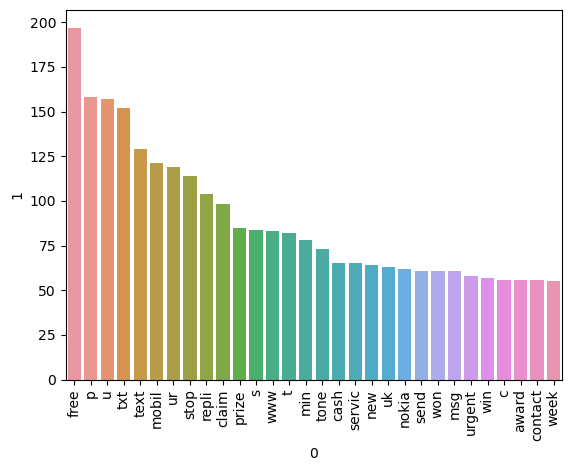

In [59]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [60]:
# Seperating all the words for ham
ham_corpus = []
for msgs in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msgs.split( ):
        ham_corpus.append(word)

In [61]:
ham_corpus

['jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'earli',
 'hor',
 'u',
 'c',
 'nah',
 't',
 'think',
 'goe',
 'usf',
 'live',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 'copi',
 'friend',
 'callertun',
 'm',
 'gonna',
 'home',
 'soon',
 't',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 've',
 'cri',
 'today',
 've',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'm',
 'watch',
 'eh',
 'u',
 'rememb',
 'spell',
 'ye',
 'v',
 'naughti',
 'v',
 'wet',
 'fine',
 's',
 'way',
 'u',
 'feel',
 's',
 'way',
 'gota',
 'b',
 'serious',
 'spell',
 'm',
 'go',
 'tr

In [62]:
len(ham_corpus)

32828

In [63]:
# Number of times each word ocurred
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 922),
 ('s', 479),
 ('m', 396),
 ('t', 383),
 ('gt', 288),
 ('lt', 287),
 ('come', 277),
 ('ok', 255),
 ('like', 236),
 ('know', 236),
 ('ll', 232),
 ('got', 227),
 ('time', 225),
 ('love', 225),
 ('day', 218),
 ('good', 216),
 ('want', 210),
 ('ur', 198),
 ('need', 174),
 ('go', 164),
 ('lor', 159),
 ('home', 156),
 ('think', 150),
 ('da', 143),
 ('k', 138),
 ('tell', 135),
 ('today', 129),
 ('r', 128),
 ('hope', 126),
 ('n', 125)]

In [64]:
# Putting it in a dataframe
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,922
1,s,479
2,m,396
3,t,383
4,gt,288
5,lt,287
6,come,277
7,ok,255
8,like,236
9,know,236


C:\Users\RICHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 's'),
  Text(2, 0, 'm'),
  Text(3, 0, 't'),
  Text(4, 0, 'gt'),
  Text(5, 0, 'lt'),
  Text(6, 0, 'come'),
  Text(7, 0, 'ok'),
  Text(8, 0, 'like'),
  Text(9, 0, 'know'),
  Text(10, 0, 'll'),
  Text(11, 0, 'got'),
  Text(12, 0, 'time'),
  Text(13, 0, 'love'),
  Text(14, 0, 'day'),
  Text(15, 0, 'good'),
  Text(16, 0, 'want'),
  Text(17, 0, 'ur'),
  Text(18, 0, 'need'),
  Text(19, 0, 'go'),
  Text(20, 0, 'lor'),
  Text(21, 0, 'home'),
  Text(22, 0, 'think'),
  Text(23, 0, 'da'),
  Text(24, 0, 'k'),
  Text(25, 0, 'tell'),
  Text(26, 0, 'today'),
  Text(27, 0, 'r'),
  Text(28, 0, 'hope'),
  Text(29, 0, 'n')])

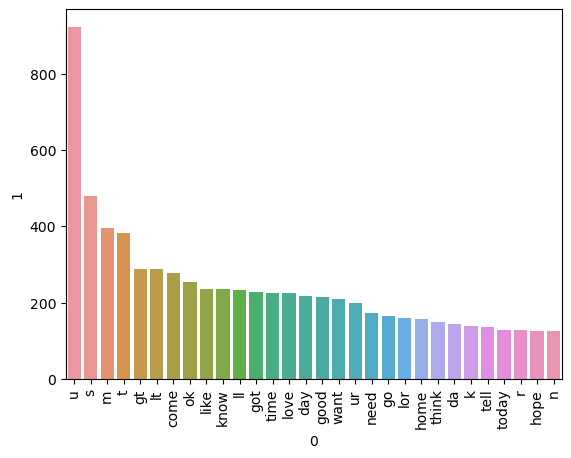

In [65]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

# 4. Model Building

In [66]:
df.head()

,Target,Text,Num_characters,Num_words,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entri wkli comp win fa cup final tkt st t...
3,0,U dun say so early hor... U c already then say...,49,11,u dun earli hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah t think goe usf live


In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
x = cv.fit_transform(df['Transformed_text']).toarray()  # Converting sparse array to dense array
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
x.shape
# (sms,words)

(5169, 6111)

In [70]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()  # Converting sparse array to dense array
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split

Traing or model when text was vectorized using CountVectorizer

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [74]:
# Importing 2-3 alg of Naive Bayes because don't know the data distribution
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8723404255319149
[[772 117]
 [ 15 130]]
0.5263157894736842


In [77]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[867  22]
 [  6 139]]
0.8633540372670807


In [78]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[882   7]
 [ 18 127]]
0.9477611940298507


So we can conclude that when we are using CountVectorizer BernoulliNaiveBayers Algorithm performs the best.

Traing or model when text was vectorized using TfidftVectorizer

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [80]:
gnb.fit(x_train,y_train)
y_pred4 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.839458413926499
[[755 145]
 [ 21 113]]
0.437984496124031


In [81]:
mnb.fit(x_train,y_train)
y_pred5 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

# Precision_score = 1,no sms was classified as spam which was not spam.

0.9825918762088974
[[900   0]
 [ 18 116]]
1.0


In [82]:
bnb.fit(x_train,y_train)
y_pred6 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9835589941972921
[[897   3]
 [ 14 120]]
0.975609756097561


### Since precision matters more here beacuse accuracy is not reliable as data is imbalanced. So, going with Multinomial_Naive_Bayers Algorithm that uses TfidfVectorizer for text.

tfid --> mnb

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
lr = LogisticRegression(solver='liblinear')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)


In [85]:
# Formed a dictionary where in keys name of algorithms were there and in values their object
clfs = {
    'LR' : lr,
    'SVC' : svc,
    'NB' : mnb,
    'KN' : knc,
    'DT' : dtc,
    'RF' : rfc
}

In [86]:
# Formes a function where we are giving input alg,x and y train data to train our data using the vairous algorithms
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  LR
Accuracy -  0.9545454545454546
Precision -  0.9887640449438202
For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9821428571428571
For  NB
Accuracy -  0.9825918762088974
Precision -  1.0
For  KN
Accuracy -  0.90715667311412
Precision -  0.975
For  DT
Accuracy -  0.9477756286266924
Precision -  0.9347826086956522
For  RF
Accuracy -  0.97678916827853
Precision -  0.9824561403508771


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.982592,1.000000
0,LR,0.954545,0.988764
5,RF,0.976789,0.982456
1,SVC,0.974855,0.982143
3,KN,0.907157,0.975000
4,DT,0.947776,0.934783


In [90]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.982592
1,LR,Accuracy,0.954545
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.974855
4,KN,Accuracy,0.907157
5,DT,Accuracy,0.947776
6,NB,Precision,1.000000
7,LR,Precision,0.988764
8,RF,Precision,0.982456
9,SVC,Precision,0.982143


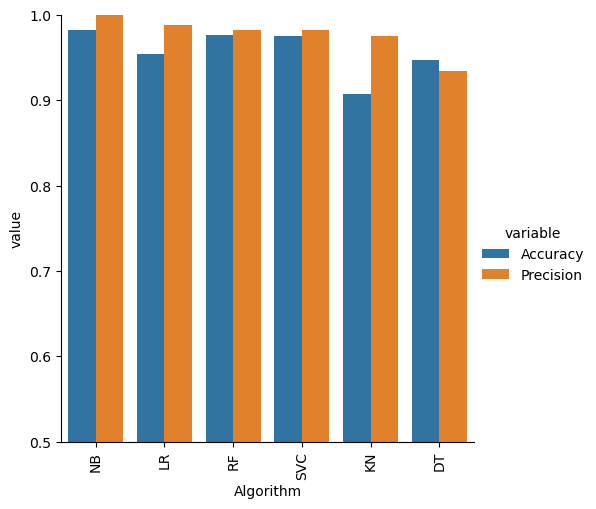

In [91]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))